# Predicted absences

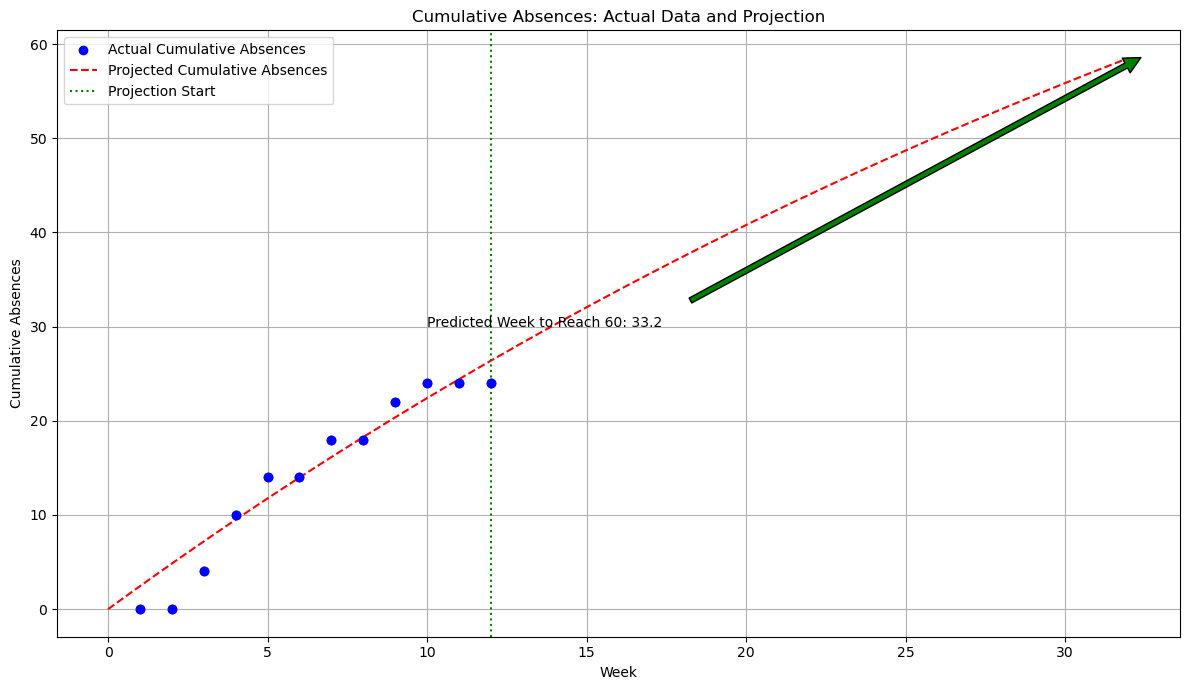

Weekly Absences: [0, 0, 4, 6, 4, 0, 4, 0, 4, 2, 0, 0]
Cumulative Absences: [0, 0, 4, 10, 14, 14, 18, 18, 22, 24, 24, 24]
Projected Weeks: [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
Projected Cumulative Absences: [28.3088412184797, 30.19888286675679, 32.051797636725304, 33.86831482717836, 35.649149410987896, 37.39500231651482, 39.10656070349123, 40.78449823348325, 42.42947533504125, 44.04213946364146, 45.62312535652148, 47.17305528250997, 48.69253928694886, 50.182175431804325, 51.642550031061326, 53.074237881494064, 54.477802488903414, 55.85379628991017, 57.20276086939165, 58.525227173646975]
Curve Fit Parameters (a, b): [124.52639558796999, 0.019838914408467814]
Predicted Week to Reach 60 Absences: 33.2


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def cumulative_function(x, a, b):
    """
    Exponential function to model cumulative absences.
    
    Parameters:
    x: week number
    a: scaling factor
    b: growth rate
    """
    return a * (1 - np.exp(-b * x))

def analyze_absences(weekly_absences, projection_weeks=20):
    """
    Analyze cumulative absences and predict when total will reach 60.
    
    Parameters:
    weekly_absences (list): List of initial weekly absence values
    projection_weeks (int): Number of additional weeks to project
    
    Returns:
    dict: Analysis results including cumulative data, curve fit parameters, 
          and predicted week to reach 60 absences
    """
    # Calculate cumulative absences
    cumulative_absences = np.cumsum(weekly_absences)
    
    # Prepare data for curve fitting
    weeks = np.arange(1, len(weekly_absences) + 1)
    
    # Perform curve fitting
    popt, _ = curve_fit(cumulative_function, weeks, cumulative_absences, 
                        p0=[60, 0.5], maxfev=10000)
    
    # Predict week when cumulative absences reach 60
    def find_week_at_target(target=60):
        for week in np.linspace(0, 52, 520):  # Check up to 52 weeks with 0.1 week precision
            if cumulative_function(week, *popt) >= target:
                return week
        return None
    
    predicted_week = find_week_at_target()
    
    # Plotting
    plt.figure(figsize=(12, 7))
    
    # Plot original data points
    plt.scatter(weeks, cumulative_absences, label='Actual Cumulative Absences', color='blue')
    
    # Generate smooth curve for fitted function with extended projection
    total_weeks = len(weeks) + projection_weeks
    smooth_weeks = np.linspace(0, total_weeks, 200)
    smooth_cumulative = cumulative_function(smooth_weeks, *popt)
    plt.plot(smooth_weeks, smooth_cumulative, label='Projected Cumulative Absences', color='red', linestyle='--')
    
    # Highlight original data points distinctly
    plt.scatter(weeks, cumulative_absences, color='blue', zorder=5)
    
    # Vertical line to separate actual and projected data
    plt.axvline(x=len(weeks), color='green', linestyle=':', label='Projection Start')
    
    plt.title('Cumulative Absences: Actual Data and Projection')
    plt.xlabel('Week')
    plt.ylabel('Cumulative Absences')
    plt.legend()
    plt.grid(True)
    
    # Add annotation for predicted week
    if predicted_week is not None:
        plt.annotate(f'Predicted Week to Reach 60: {predicted_week:.1f}', 
                     xy=(predicted_week, 60), 
                     xytext=(10, 30),
                     arrowprops=dict(facecolor='green', shrink=0.05))
    
    plt.tight_layout()
    plt.show()
    
    # Project cumulative absences for additional weeks
    projected_weeks = np.arange(len(weeks) + 1, total_weeks + 1)
    projected_cumulative = cumulative_function(projected_weeks, *popt)
    
    return {
        'weekly_absences': weekly_absences,
        'cumulative_absences': cumulative_absences.tolist(),
        'projected_weeks': projected_weeks.tolist(),
        'projected_cumulative': projected_cumulative.tolist(),
        'curve_fit_params': popt.tolist(),
        'predicted_week_at_60': predicted_week
    }

# Example usage
def main():
    # Example weekly absence data (replace with your actual data)
    #weekly_absences = [5, 4, 6, 3, 7, 5, 4, 6, 5, 4, 3, 5] # testing
    weekly_absences = [0, 0, 4, 6, 4, 0, 4, 0, 4, 2, 0, 0 ] # 1
    #weekly_absences = [9, 0, 0, 2, 3, 10, 0, 0, 1, 0, 0, 0 ] # 2
    
    # Analyze and visualize the absences with 20 weeks of projection
    results = analyze_absences(weekly_absences, projection_weeks=20)
    
    # Print out the results
    print("Weekly Absences:", results['weekly_absences'])
    print("Cumulative Absences:", results['cumulative_absences'])
    print("Projected Weeks:", results['projected_weeks'])
    print("Projected Cumulative Absences:", results['projected_cumulative'])
    print("Curve Fit Parameters (a, b):", results['curve_fit_params'])
    print(f"Predicted Week to Reach 60 Absences: {results['predicted_week_at_60']:.1f}")

if __name__ == '__main__':
    main()